# Lab Segmentation 1

In [3]:
import skimage.io as io
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import histogram
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
## For all requirements: The quality of the results is evaluated.


# 1- Read the image 
# [VERY IMPORTANT] and convert it to float: image = image.astype(float)

# read image golf


# 2- Retreive the 3 channels of the image(R,G,B) (will be used in the coming steps)


# 3- Visually (not by code) detect the dominating color channel (C) for the backgroung (R, G or B)
##rgb(73, 122, 57)

# 4- Draw the dominating channel (r, g or b) thresholded by some threshold (to make sure your choice is meaningful)


# 5- Get an intuitive way(There is a very simple way) to make a mask that can get the pixels where the values of the dominating channels 
# have larger values than the other channels with an appropriate threshold

# 6- display the binarized image






In [2]:
def show_images(images, titles=None):
    # This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None:
        titles = ['(%d)' % i for i in range(1, n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image, title in zip(images, titles):
        a = fig.add_subplot(1, n_ims, n)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()


def showHist(img):
    # An "interface" to matplotlib.axes.Axes.hist() method
    plt.figure()
    imgHist = histogram(img, nbins=256)

    bar(imgHist[1].astype(np.uint8), imgHist[0], width=0.8, align='center')

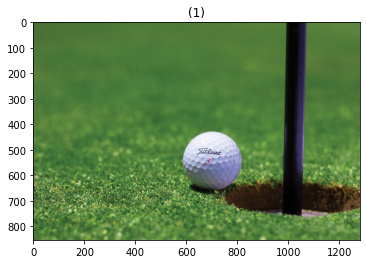

In [5]:
# 1- Read the image 
# [VERY IMPORTANT] and convert it to float: image = image.astype(float)
# read image golf

img = io.imread('imgs/exp1/golf.jpeg')
show_images([img])
img = img.astype(float)

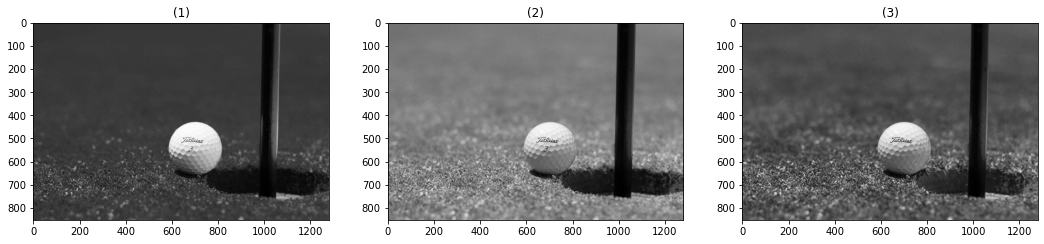

In [6]:
# 2- Retreive the 3 channels of the image(R,G,B) (will be used in the coming steps)

R = img[:, :, 2]
G = img[:, :, 1]
B = img[:, :, 0]

show_images([R,G,B])


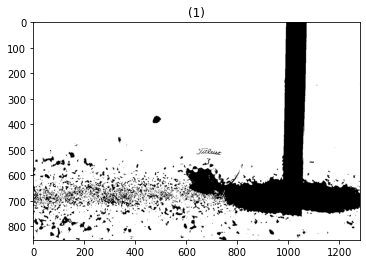

In [7]:
# 3- Visually (not by code) detect the dominating color channel (C) for the backgroung (R, G or B)
     
    ##rgb(73, 122, 57)

# 4- Draw the dominating channel (r, g or b) thresholded by some threshold (to make sure your choice is meaningful)
    ## Green channel 

green_channel = np.zeros_like(G)
green_channel=G>110
show_images([green_channel])

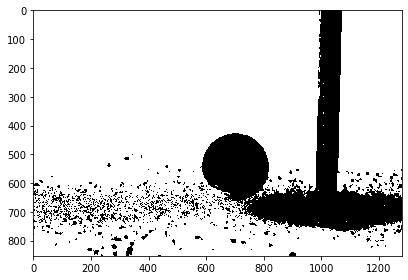

In [8]:
# 5- Get an intuitive way(There is a very simple way) to make a mask that can get the pixels where the values of the dominating channels 
# have larger values than the other channels with an appropriate threshold

# 6- display the binarized image

res=np.zeros_like(G)
res[np.logical_and((G >1.3*R), (G >B*1.3))] = 1
io.imshow(res)

In [ ]:
# 1- Get the required RGB color (Using a color picker)

#rgb(79, 107, 27)


# 2- Read image

# 3- extract R, G and B channels (as float)

# 4- calculate differences FOR EACH CHANNEL (between the image and the required pixel value)

# 5- calculate overall distance from the given RGB color (use any appropriate distance measure, take care of the minus distances)

# 6-  create a mask by thresholding the differences

# 7- In the input image, Replace the pixels of the mask with the following color
# R = 230 , G = 90 , B=40

# 8- show the image or save it


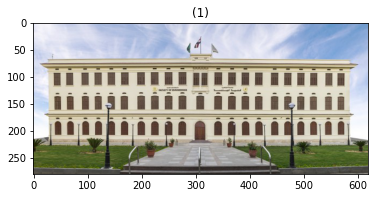

In [9]:
# 2- Read image

img = io.imread('imgs/exp2/cufe.png')
show_images([img])
img = img.astype(float)

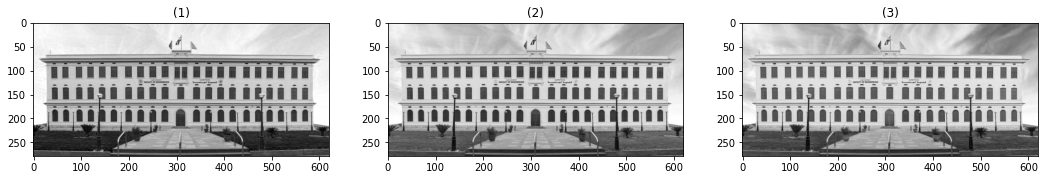

In [10]:
# 3- extract R, G and B channels (as float)

R = img[:, :, 2]
G = img[:, :, 1]
B = img[:, :, 0]

show_images([R,G,B])

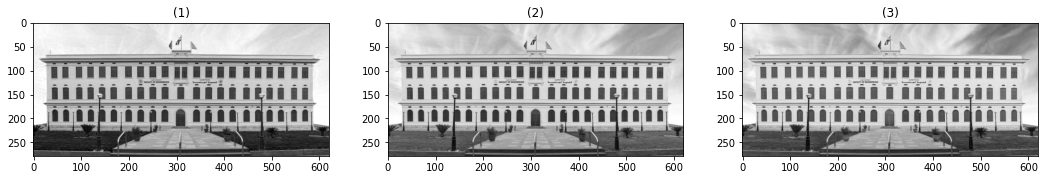

In [13]:
# 4- calculate differences FOR EACH CHANNEL (between the image and the required pixel value)

#rgb(27, 107, 79)

R_diff=R-27
G_diff=G-107
B_diff=B-79

show_images([R,G,B])

[[297.48949561 300.86541842 302.55412739 ... 187.54732736 187.20576914
  188.58685002]
 [295.80229884 297.48949561 299.17720501 ... 188.93649727 188.58685002
  188.58685002]
 [294.11562352 294.11562352 295.80229884 ... 188.93649727 190.33129012
  190.33129012]
 ...
 [ 54.2678542   54.2678542   52.84884105 ...  52.01922721  52.20153254
   52.01922721]
 [ 48.856934    50.57667447  51.4003891  ...  69.41181456  67.15653356
   68.27151675]
 [ 48.20788317  48.57983121  49.58830507 ... 163.72232591 152.26949793
  152.26949793]]


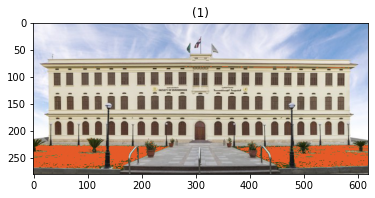

In [15]:
# 5- calculate overall distance from the given RGB color (use any appropriate distance measure, take care of the minus distances)

distance = np.sqrt(R_diff**2 + G_diff**2 + B_diff**2)
print(distance)

# 6-  create a mask by thresholding the differences
mask = distance<36

res = img.copy()
res[mask] = (230, 90, 40)
show_images([res/255])